 Hari Kosuru, hk8663,
 Atreya Misra, am73676

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.lda import LDA
from sklearn.qda import QDA
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneOut
from sklearn import cross_validation
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split


import random

Problem 3:

Problem 6: Problem 8 from Chapter 5.

In [16]:
weekly = pd.read_csv("Weekly.csv")
print weekly.corr() #print correlation matrix to discover most impactful corss correlations

weekly.Today.hist()
plt.title('Histogram of Todays Returns')
plt.xlabel('Today Return Level')
plt.ylabel('Frequency')

#weekly.Direction.hist()
plt.title('Histogram of Direction')
plt.xlabel('Today Return Level')
plt.ylabel('Frequency')

#pd.crosstab(weekly.Today, weekly.Direction.astype(bool)).plot(kind='bar')
#plt.title('Todays Return based on market direction')
#plt.xlabel('Market Rating')
#plt.ylabel('Frequency')

y = weekly.Direction
X = weekly.drop(['Direction', 'Today', 'Year'], 1)
#X = pd.read_csv("Weekly.csv", usecols = [Lag1, Lag2, Lag3, Lag4, Lag5, Volume])
#print y.head()
#print X.head()
#print weekly.head()

log = LogisticRegression()
log = log.fit(X,y)
print "LOGISTIC ACCURACY:"
print log.score(X,y)
print "LOGISTIC SUMMARY:"
print pd.DataFrame(zip(X.columns, np.transpose(log.coef_))) #nothing seems to be correlated

conmatrixLogistic = confusion_matrix(y, log.predict(X))

print "LOGISTIC CONFUSION MATRIX:"
print conmatrixLogistic


lda=LDA()
lda.fit(X,y)
print "LDA ACCURACY:"
print lda.score(X,y)
print "LDA SUMMARY:"
print pd.DataFrame(zip(X.columns, np.transpose(lda.coef_))) 
conmatrixLDA = confusion_matrix(y, lda.predict(X))

print "LDA CONFUSION MATRIX:"
print conmatrixLDA


qda=QDA()
qda.fit(X,y)
print "QDA ACCURACY:"
print qda.score(X,y)
print "QDA SUMMARY:"
print pd.DataFrame(zip(X.columns, np.transpose(qda.rotations_))) 
conmatrixQDA = confusion_matrix(y, qda.predict(X))

print "QDA CONFUSION MATRIX:"
print conmatrixQDA

knn=KMeans(n_clusters=1)
knn.fit(X,y)
print "KNN ACCURACY:"
print knn.score(X,y)

            Unnamed: 0      Year      Lag1      Lag2      Lag3      Lag4  \
Unnamed: 0    1.000000  0.998863 -0.031577 -0.033129 -0.030420 -0.030935   
Year          0.998863  1.000000 -0.032289 -0.033390 -0.030006 -0.031128   
Lag1         -0.031577 -0.032289  1.000000 -0.074853  0.058636 -0.071274   
Lag2         -0.033129 -0.033390 -0.074853  1.000000 -0.075721  0.058382   
Lag3         -0.030420 -0.030006  0.058636 -0.075721  1.000000 -0.075396   
Lag4         -0.030935 -0.031128 -0.071274  0.058382 -0.075396  1.000000   
Lag5         -0.030382 -0.030519 -0.008183 -0.072499  0.060657 -0.075675   
Volume        0.842095  0.841942 -0.064951 -0.085513 -0.069288 -0.061075   
Today        -0.031183 -0.032460 -0.075032  0.059167 -0.071244 -0.007826   

                Lag5    Volume     Today  
Unnamed: 0 -0.030382  0.842095 -0.031183  
Year       -0.030519  0.841942 -0.032460  
Lag1       -0.008183 -0.064951 -0.075032  
Lag2       -0.072499 -0.085513  0.059167  
Lag3        0.060657 -0.

Problem 5:

In [21]:
default = pd.read_excel("Default.xlsx")
y1 = default.default
X1 = default.drop(['default', 'student'], 1)
log1 = LogisticRegression()
log1 = log1.fit(X1,y1)
print "LOGISTIC ACCURACY FOR 5:"
print log1.score(X1,y1)

def CrossValidate(train, validate):
    yt = train.default
    Xt = train.drop(['default', 'student'], 1)
    yv = validate.default
    logt = LogisticRegression()
    logt = logt.fit(Xt,yt)
    print "LOGISTIC ACCURACY ON OWN TRAINING SET:"
    print logt.score(Xt,yt)
    print "LOGISTIC ACCURACY ON VALIDATE SET:"
    print logt.score(Xt,yv)
    pred = logt.predict(Xt)
    

train1 = default[0:4999]
validate1 = default[5000:9999]
CrossValidate(train1, validate1)

train2 = default[0:2500]
validate2 = default[2501:5001]
CrossValidate(train2, validate2)

train3 = default[0:4000]
validate3 = default[4001:8001]
CrossValidate(train3, validate3)

train4 = default[0:1000]
validate4 = default[1001:2001]
CrossValidate(train4, validate4)

default['StudentBool'] = (default.student == 'Yes').astype(int)

y2 = default.default
X2 = default.drop(['default', 'student'], 1)
log2 = LogisticRegression()
log2 = log1.fit(X2,y2)
print "LOGISTIC ACCURACY FOR 5 WHEN STUDENT DUMMY ADDED:"
print log1.score(X2,y2)

traind1 = default[0:4999]
validated1 = default[5000:9999]
CrossValidate(traind1, validated1)

traind2 = default[0:2500]
validated2 = default[2501:5001]
CrossValidate(traind2, validated2)

traind3 = default[0:4000]
validated3 = default[4001:8001]
CrossValidate(traind3, validated3)

traind4 = default[0:1000]
validated4 = default[1001:2001]
CrossValidate(traind4, validated4)

LOGISTIC ACCURACY FOR 5:
0.9664
LOGISTIC ACCURACY ON OWN TRAINING SET:
0.964792958592
LOGISTIC ACCURACY ON VALIDATE SET:
0.968193638728
LOGISTIC ACCURACY ON OWN TRAINING SET:
0.9636
LOGISTIC ACCURACY ON VALIDATE SET:
0.9664
LOGISTIC ACCURACY ON OWN TRAINING SET:
0.9655
LOGISTIC ACCURACY ON VALIDATE SET:
0.968
LOGISTIC ACCURACY ON OWN TRAINING SET:
0.967
LOGISTIC ACCURACY ON VALIDATE SET:
0.963
LOGISTIC ACCURACY FOR 5 WHEN STUDENT DUMMY ADDED:
0.9664
LOGISTIC ACCURACY ON OWN TRAINING SET:
0.964792958592
LOGISTIC ACCURACY ON VALIDATE SET:
0.968193638728
LOGISTIC ACCURACY ON OWN TRAINING SET:
0.9636
LOGISTIC ACCURACY ON VALIDATE SET:
0.9664
LOGISTIC ACCURACY ON OWN TRAINING SET:
0.9655
LOGISTIC ACCURACY ON VALIDATE SET:
0.968
LOGISTIC ACCURACY ON OWN TRAINING SET:
0.967
LOGISTIC ACCURACY ON VALIDATE SET:
0.963


Problem 6:

What is n and p?
n = 100, p = 2

Part b) Well, it looks like a quadratic! Makes sense, since it is -x^2.

Rest of Problem 6:

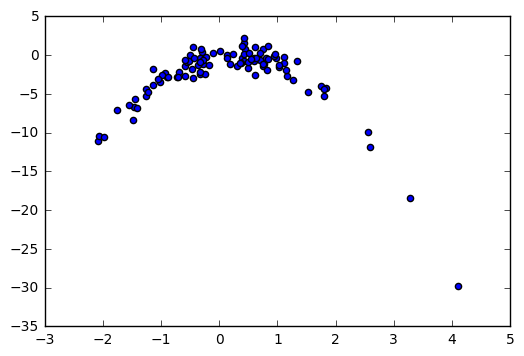

Degree: 1
y=  -0.679531119743x^1  -2.46825775682x^0
ERROR IS: 20.7267517182
STATITICAL SIGNIFICANCE:
          0         1
0  1.161521 -0.674629
1  0.386078 -2.482079
Degree: 2
y=  -2.01164305468x^2  1.06994299695x^1  -0.18393953814x^0
ERROR IS: 0.964265885886
STATITICAL SIGNIFICANCE:
          0         1
0  1.161521 -2.011984
1  0.386078  1.069535
2 -1.133133 -0.181566
Degree: 3
y=  -0.0117605217748x^3  -1.9834543183x^2  1.10702128892x^1  -0.209380519764x^0
ERROR IS: 0.975694542037
STATITICAL SIGNIFICANCE:
          0         1
0  1.161521 -0.011393
1  0.386078 -1.984616
2 -1.133133  1.105528
3  0.433093 -0.206632
Degree: 4
y=  0.00345142553692x^4  -0.0229070398319x^3  -1.99779744514x^2  1.13254902486x^1  -0.203844623191x^0
ERROR IS: 0.988417066057
STATITICAL SIGNIFICANCE:
          0         1
0  1.161521  0.003399
1  0.386078 -0.022379
2 -1.133133 -1.998710
3  0.433093  1.130704
4 -0.304086 -0.201251
Degree: 1
y=  -0.679531119743x^1  -2.46825775682x^0
ERROR IS: 20.7267517182
STATIT

In [44]:
np.random.seed(2)
y = np.random.normal(0, 1, 100)
x = np.random.normal(0, 1, 100)

y = x - 2 * x**2 + np.random.normal(0, 1, 100)

plt.scatter(x, y)
plt.show()


from sklearn.cross_validation import LeaveOneOut
for deg in range(1,5):
    print("Degree: "+str(deg))
    fit=np.polyfit(x,y,deg)
    estimator=0
    estimatorStr="y="
    for d in range(deg,-1,-1):
        estimator+ = x**d * fit[deg-d]
        estimatorStr+="  "+str(fit[deg-d])+"x^"+str(d)
    
    print(estimatorStr)

    MSESum=0.0
    loo = LeaveOneOut(100)
    for train, test in loo:
        fit=np.polyfit(x[train],y[train],deg)
        estimator=0
        for d in range(deg,-1,-1):
            estimator+=fit[deg-d]*x[test]**d
        MSESum+=(y[test]-estimator)**2.0
    MSESum*=(1.0/len(y))
    print("ERROR IS: "+ str(MSESum[0]))
    print("STATITICAL SIGNIFICANCE:")
    print pd.DataFrame(zip(x, fit))
    

np.random.seed(1012312)

for deg in range(1,5):
    print("Degree: "+str(deg))
    fit=np.polyfit(x,y,deg)
    estimator=0
    estimatorStr="y="
    for d in range(deg,-1,-1):
        estimator+=fit[deg-d]*x**d
        estimatorStr+="  "+str(fit[deg-d])+"x^"+str(d)
    
    #plot and show estimate using all data
    print(estimatorStr)
    #plt.scatter(x,estimator)
    #plt.show()
    
    #Find loocv error
    MSESum=0.0
    loo = LeaveOneOut(100)
    for train, test in loo:
        fit=np.polyfit(x[train],y[train],deg)
        estimator=0
        for d in range(deg,-1,-1):
            estimator+=fit[deg-d]*x[test]**d
        MSESum+=(y[test]-estimator)**2.0
    MSESum*=(1.0/len(y))
    print("ERROR IS: "+ str(MSESum[0]))
    print("STATITICAL SIGNIFICANCE:")
    print pd.DataFrame(zip(x, fit))

Problem 7: Problem 9 from Chapter 6

In [100]:
college = pd.read_csv('College.csv')

y = college["Apps"]
x = college.drop("Apps", axis=1).drop("Private", axis=1)
x = x.loc[:,"Accept":]

Part a)

In [101]:
# 75% Train, 25% Test
x_train, x_test, y_train, y_test = train_test_split(x, y)

Part b) Linear Regression

In [102]:
clf = LinearRegression()
clf.fit(x_train, y_train);

test_error = mean_squared_error(y_test, clf.predict(x_test))
print 'Linear Regression MSE: ' + str(test_error)

Linear Regression MSE: 1238847.45154


Part c) Ridge Regression with CV

In [103]:
clf = RidgeCV()
clf.fit(x_train, y_train);

test_error = mean_squared_error(y_test, clf.predict(x_test))
print 'Ridge Regression with CV MSE: ' + str(test_error)

Ridge Regression with CV MSE: 1238885.60275


Part d) Lasso Model with CV

In [104]:
clf = LassoCV()
clf.fit(x_train, y_train);

test_error = mean_squared_error(y_test, clf.predict(x_test))
print 'Lasso with CV MSE: ' + str(test_error)

Lasso with CV MSE: 1448803.86814


Part e) PCR

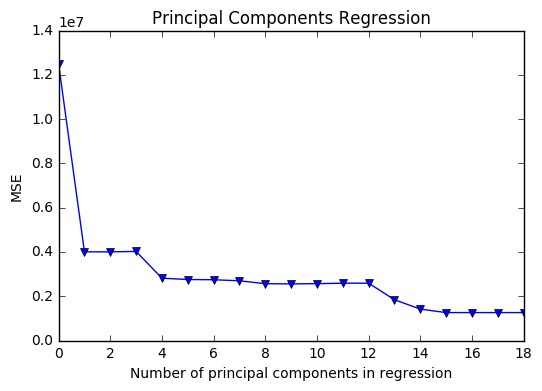

In [105]:
# Used this as reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11/Lab%2011%20-%20PCR%20and%20PLS%20Regression%20in%20Python.pdf

pca = PCA()
X_reduced = pca.fit_transform(scale(x))

kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)

n = len(X_reduced)
regr = LinearRegression()
mse = []

# # Calculate MSE with only the intercept (no principal components in regression)
# score = -1*cross_validation.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=kf_10, scoring='mean_squared_error').mean()
# mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(mse, '-v')
ax1.set_title("Principal Components Regression")
ax1.set_xlabel("Number of principal components in regression")
ax1.set_ylabel('MSE')

plt.show()

Note that the lowest cross validation error seems to occur at M = 14. We will select this for our CV

In [106]:
print 'MSE at M = 14: ' + str(mse[14])

MSE at M = 14: 1417532.03033


This MSE is comparabe to the other regression models. It is a little bit higher, which is expected, since we are using fewer dimensions/components.

Part f) PLS

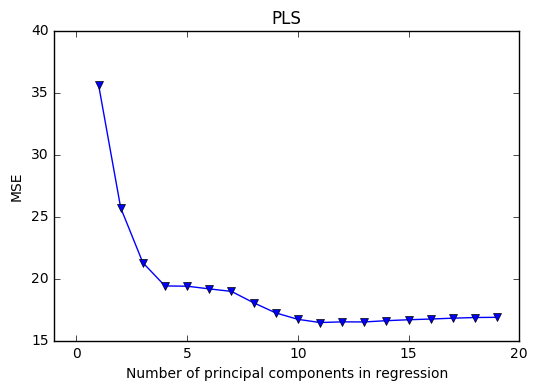

Error: 34.4716791027


In [80]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = cross_validation.train_test_split(x, y)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

n = len(X_train)
# 10-fold CV, with shuffle
kf_10 = cross_validation.KFold(n, n_folds=10, shuffle=True, random_state=1)
mse = []
for i in np.arange(1, 20):
    pls = PLSRegression(n_components=i)
    score = cross_validation.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)
# Plot results
plt.plot(np.arange(1, 20), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('PLS')
plt.xlim(xmin=-1)
plt.show()


pls = PLSRegression(n_components=7)
pls.fit(scale(X_train), y_train)

print 'Error: ' + str(mean_squared_error(y_test, pls.predict(scale(X_test))))


RidgeCV MSE: 1.57946405383e-09
MSE for LassoCV: 0.014342093168


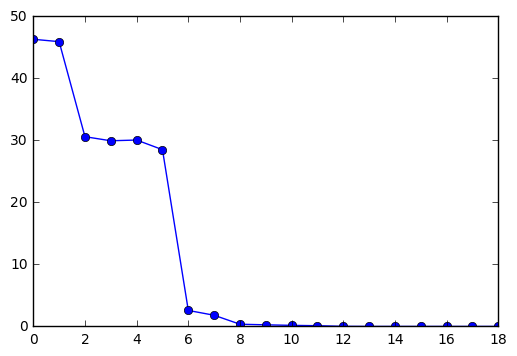

In [45]:
boston_data = pd.read_csv('Boston.csv')
y = boston_data["crim"]
x = boston_data.loc[:, "crim":]

model = RidgeCV()
train_x, test_x, train_y, test_y = train_test_split(x, y)
result = model.fit(train_x, train_y)
print "RidgeCV MSE: " + str(mean_squared_error(test_y, model.predict(test_x)))


model = LassoCV()
train_x, test_x, train_y, test_y = train_test_split(x, y)
result = model.fit(train_x, train_y)
print "MSE for LassoCV: " + str(mean_squared_error(test_y, model.predict(test_x)))

pcr = PCA()
X_reduced = pcr.fit_transform(scale(x))
n = len(X_reduced)
KFold_10 = cross_validation.KFold(n, n_folds = 10, shuffle = True, random_state = 1)
regr = LinearRegression()
mse = []


for i in xrange(1, 20):
    score = -1*cross_validation.cross_val_score(regr, X_reduced[:, :i], y.ravel(), cv = KFold_10, scoring = 'neg_mean_squared_error').mean()
    mse.append(score)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(mse, '-o')
plt.show()

Problem 9:
Part a)

In [55]:
p = 50;
n = 51;
j = np.random.randint(0, high=50)

x_mean = np.zeros(p)
e_mean = np.zeros(n)
x_cov = np.identity(p)
e_cov = np.identity(n)

clf = LinearRegression()
B = np.ones(p).reshape(p, 1)

def getModel(clf):
    B_hat = []
    for i in range(0, 100):
        x = np.random.multivariate_normal(x_mean, x_cov, size=n)
        e = np.random.multivariate_normal(e_mean, e_cov).reshape(n, 1)

        y = x.dot(B) + e

        clf.fit(x, y)
        val = clf.coef_[0][j]
        B_hat.append(val)
        
    return B_hat
    
print 'B_hat mean for ' + str(j) + 'th element: ' + str(np.mean(B_hat))
print 'B_hat variance for ' + str(j) + 'th element: ' + str(np.var(B_hat))


B_hat mean for 35th element: 0.992163512279
B_hat variance for 35th element: 58.3299146838


Part b)

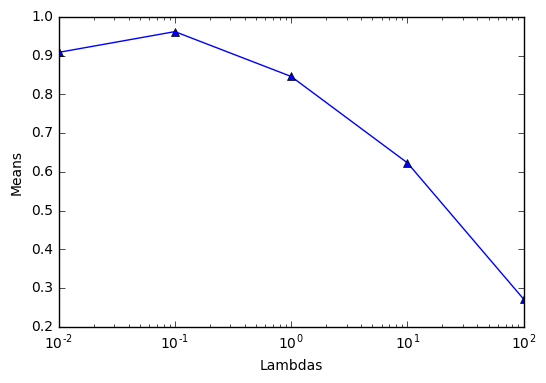

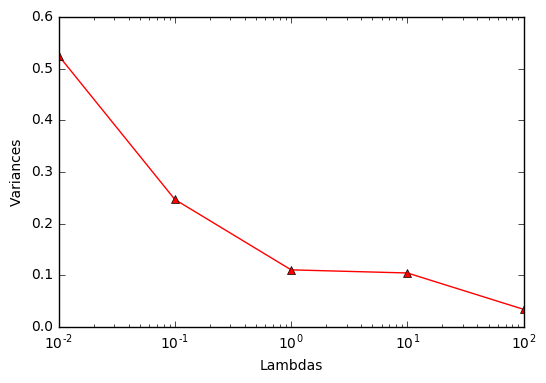

In [61]:
B_means = []
B_vars = []

lambdas = [.01, .1, 1, 10, 100]

for i in lambdas:
    ridge = Ridge(alpha = i)
    B_hat = getModel(ridge)
    B_means.append(np.mean(B_hat))
    B_vars.append(np.var(B_hat))
    
plt.semilogx(lambdas, B_means, c = 'b', marker = '^')
plt.xlabel('Lambdas')
plt.ylabel('Means')
plt.show()


plt.semilogx(lambdas, B_vars, c = 'r', marker = '^')
plt.xlabel('Lambdas')
plt.ylabel('Variances')
plt.show()